# BERT pretrained model 제작[프로젝트]

# 프로젝트 제출 루브릭  
  
* 평가기준  
    
한글 코퍼스를 가공하여 BERT pretrain용 데이터셋을 잘 생성하였다.  
MLM, NSP task의 특징이 잘 반영된 pretrain용 데이터셋 생성과정이 체계적으로 진행되었다.  
    **→ MLM, NSP를 검증 후 적용된 pretrain용 데이터셋 생성함**  
  
구현한 BERT 모델의 학습이 안정적으로 진행됨을 확인하였다.  
학습진행 과정 중에 MLM, NSP loss의 안정적인 감소가 확인되었다.  
    **→ MLM, NSP loss 그래프를 통해 감소 확인**  
  
1M짜리 mini BERT 모델의 제작과 학습이 정상적으로 진행되었다.  
학습된 모델 및 학습과정의 시각화 내역이 제출되었다.  
    **→ 모델 제작, 학습 과정과 결과, 데이터 셋을 통한 결과 및 시각화 자료 출력**  
      

# 프로젝트 계획

-학습 목표는 BERT 구조, MLM과 NSP 데이터 전처리 기법, Pretrained model 제작 과정을 이해하는 것.  
 따라서 중요한 것은 다양한 실험을 진행하는 것 보다는 구조를 이해하는 데에 중점을 둔다.   
-노드에서 제공된 코드를 사용.  
-Vocab size 8000 sentencepice 사용  
-Mini BERT BaseLine을 구축하고 작은 데이터에 적합하도록 하이퍼파라미터를 조정하여 성능 최적화  

# 결과 
  
- 하이퍼파라미터 및 모델  
    "d_model": 256,  
    "n_head": 8,   
    "d_head": 64,  
    "dropout": 0.1,  
    "d_ff": 1024,  
    "layernorm_epsilon": 0.001,  
    "n_layer": 6,  
    "n_seq": 256,  
    "n_vocab": 3000,  
    "i_pad": 0  
    optimizer = optim.Adam(pre_train_model.parameters(), lr=1e-4)  
    epochs = 100  
    batch_size = 64  

- Loss & Accuracy Graph
  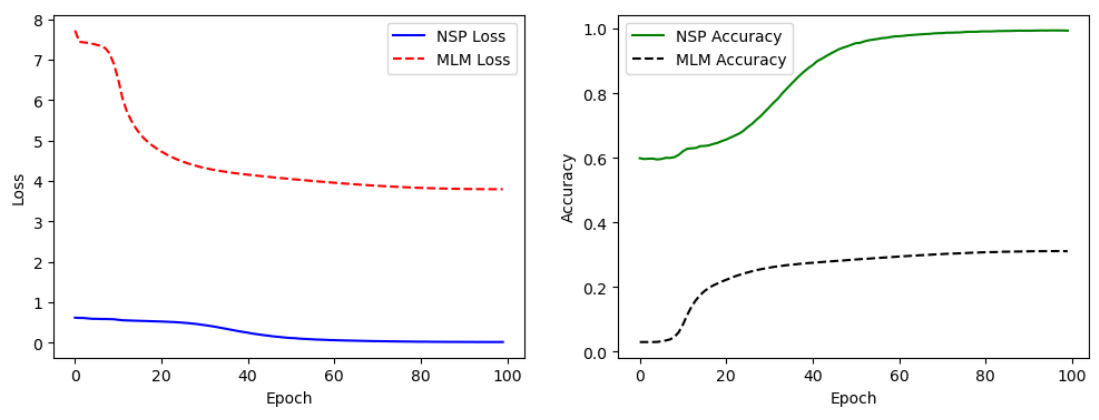

  

# 실험 기록
  
   
# 실험 1.  
    BaseLine 구축 후 실험하였으나 Loss의 변화가 없음.  
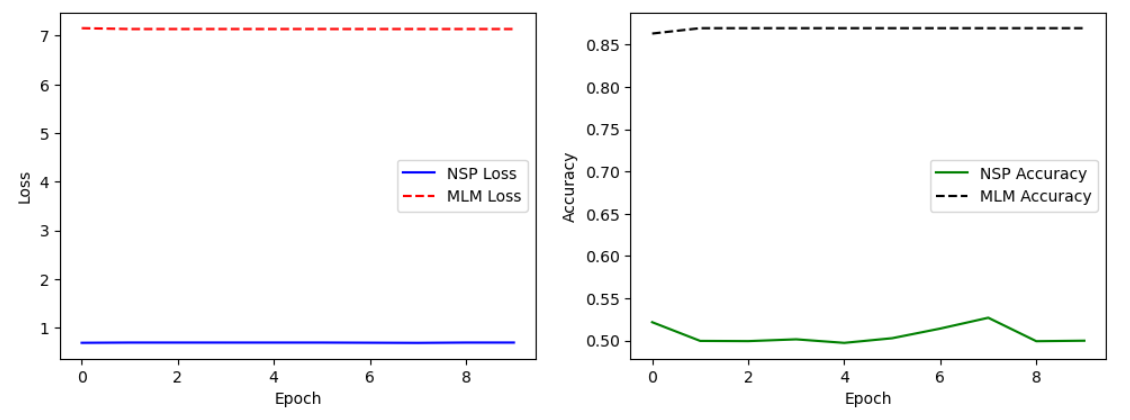  
  
    * 코드상의 2가지 문제 발견, 문제를 1개씩 수정하면서 변화를 살피기로함  
    -문제1: Encoder Layer class 정의(class PooledOutput, class PreTrainModel)에서 Softmax 중복 사용  
    -문제2: 학습률 스케쥴러 미반영  
  
       
# 실험 2.
    문제1 Softmax 중복 사용 수정  
    -수정후 그래프 변화 발견, Acc 그래프의 중간에 튀는 특이점이 사라짐, 다만 여전히 Loss와 Acc에 의미있는 변화는 없음  
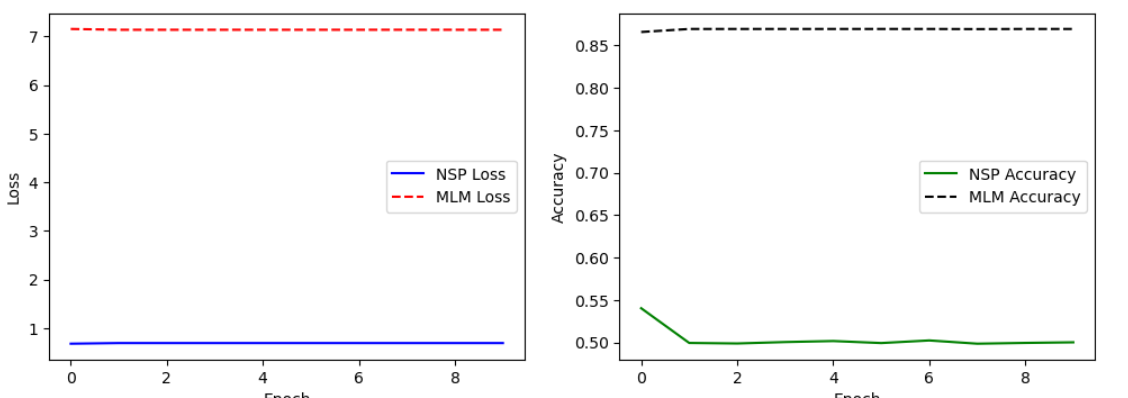  
           
  
# 실험 3.
    문제2 학습률 스케쥴러 정상 변경  
    -수정후 소폭이나마 Loss 감소와 Acc 상승 함    
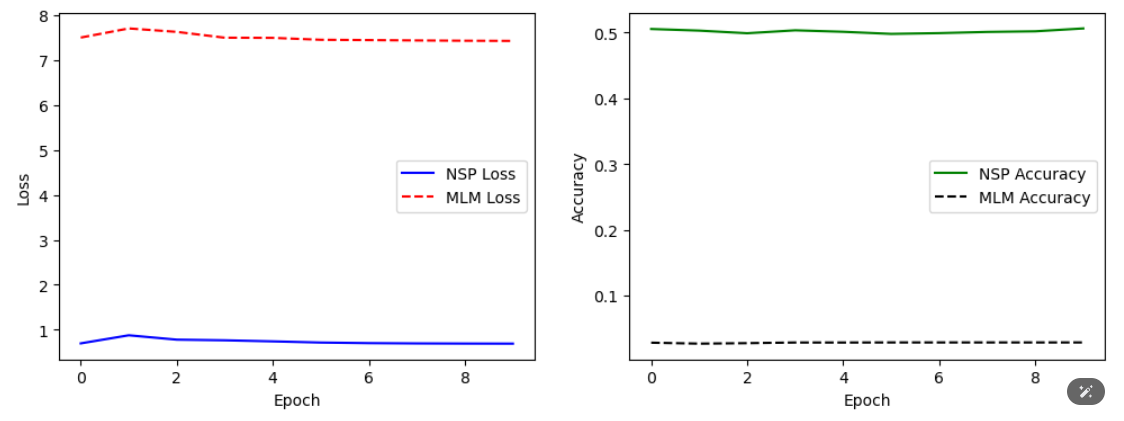  
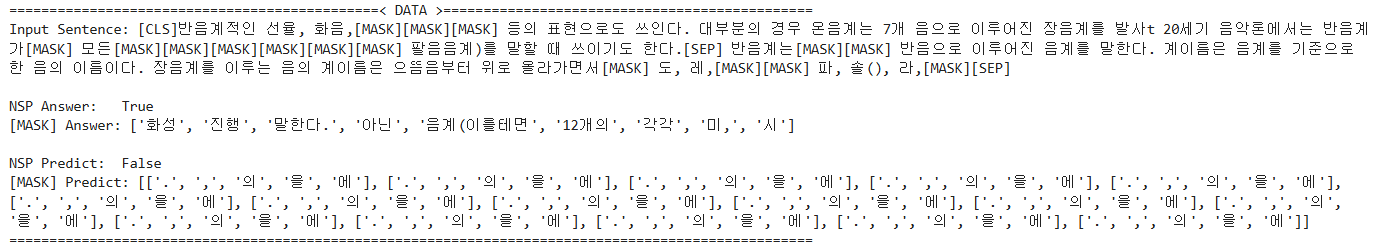  
      
  
# 실험 4.  
    모델 하이퍼파라미터 수정  
    -그래프에 변화는 있으나 NSP Predict 의미있는 문장을 출력하지 못함. 모델이 학습을 하기에는 너무 단순하다고 판단.   
    > 모델 사이즈를 조정하는 하이퍼파라미터를 수정하면서 짧게 다수 실험.   
    > 최종 아래와 같은 하이퍼파라미터와 충분한 학습을 위한 횟수(100 epoch)로 실험.   
    **"d_model": 128 > 256**  
    **"n_head": 4 > 8**  
    "d_head": 64,  
    "dropout": 0.1,  
    "d_ff": 1024,  
    "layernorm_epsilon": 0.001,  
    **"n_layer": 2 > 6**  
    "n_seq": 256,  
    "n_vocab": 3000,  
    "i_pad": 0  
    **"max_lr=1e-3" > 1e-4**  
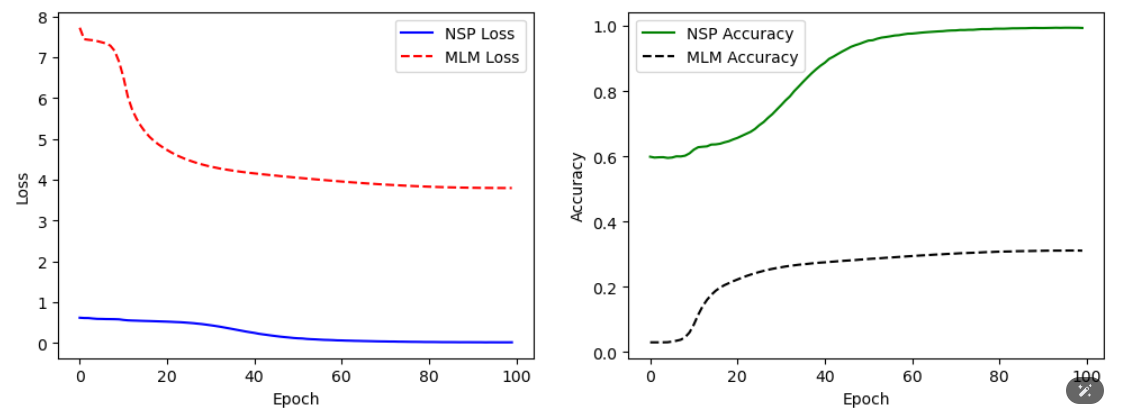  
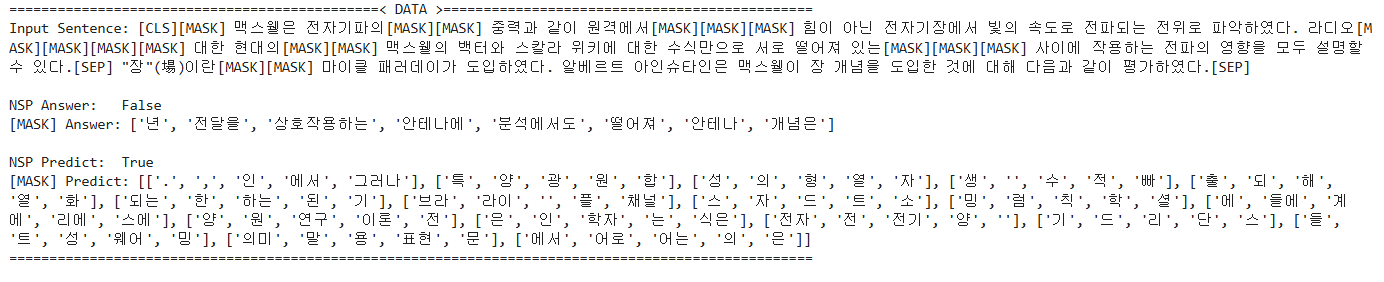  
  
    *  NSP: 성공적인 학습:   
        NSP Loss는 0.018까지 떨어지고 NSP Acc는 **99%**를 넘음  
    *  MLM: 한계(학습 정체):   
        약 40~50 epoch 이후로 성능 향상이 멈춘 상태  
        MLM Loss는 ~7.7에서 시작하여 4.1 부근까지 빠르게 감소하다가, 이후 50 epoch 동안 3.8까지 매우 더디게 감소.  
        MLM Acc 25% 부근부터 증가세가 둔화되어 최종적으로 **31%**에 머무름.  
          
        → MLM 성능 정체 이유 추정: (1) 모델의 표현력 부족, (2) 데이터의 양 또는 질 부족, (3) 학습 방법의 한계  
        2)와3) 데이터의 양과 질, 학습 방법 변화는 이번 프로젝트를 통한 핵심 학습 목표가 아님.  
        학습 대상인 BERT모델 자체를 더 이해할 수 있는 방향인 1) 모델 표현력 부족 개선을 위한 모델 사이즈를 더 수정해보기로 함  

    
# 실험5,6,7.   
    -모델 사이즈 확장 후 테스트   
     아래와 같이 더 복잡한 모델을 테스트하기 위해 순차적으로 하이퍼파라미터를 증가 시켜 보았으나 결과적으로 성능이 악화되어 실험 중단.    
       
    "d_model": 512,  
    "n_head": 8,  
    "d_head": 64,  
    "dropout": 0.2,  
    "d_ff": 2048,  
    "layernorm_epsilon": 0.001,  
    "n_layer": 12,  
    "n_seq": 256,  
    "n_vocab": 8007,  
    "lr" : 5e-5  
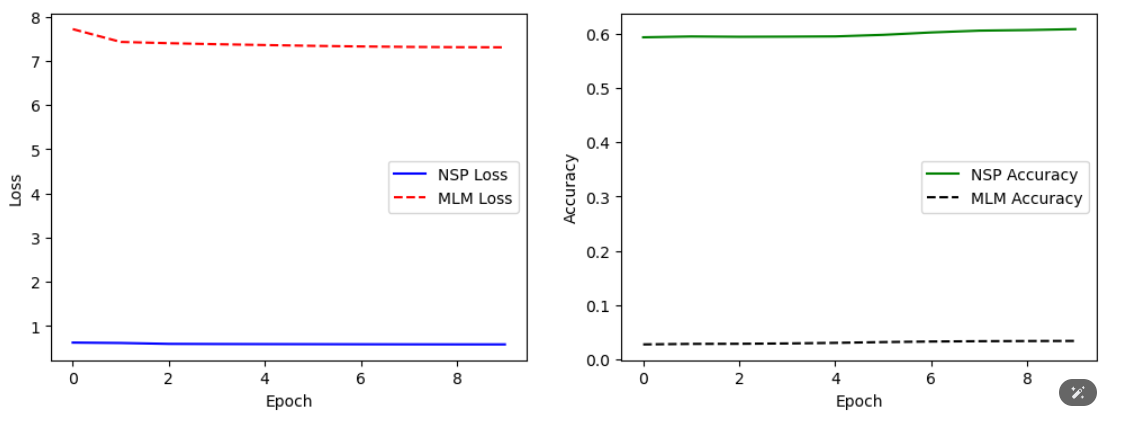  

    
        
    


# 회고  
-결과물이 사용 가능한 수준이 아니어서 MLM과 NSP, Pretrained model 실습 자체에 의미가 크다.  
 실제 사용 가능한 수준의 모델을 만드려면 어느 정도의 자원과 시간이 필요할까?  
  
-이번 프로젝트는 최대한 차분하게 진행해보려고 노력했다. 
 허둥지둥 거리면서 프로젝트를 쳐지는 않은 듯하지만....   
 베이스라인을 잡고 어느 정도 정상적인 출력물이 나오기 전까지는 전반적인 '감'을 잡기가 아직도 어려운듯..
 아마도 이론이 부족해서 일듯. 과도기라고 생각 함. 실습과 이론 학습을 병행하는게 쉽지 않지만....학습적으로는 효과적이긴 한듯. 
 

# 코드

In [1]:
#다음 라이브러리를 설치해주세요
!pip install sentencepiece
!pip install tqdm
!conda install -y -c conda-forge ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install torchsummary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.7 MB/s eta 0:00:00
Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.8.3   |       hbd8a1cb_0         151 KB  conda-forge
    certifi-2025.8.3           |     pyhd8ed1ab_0         155 KB  conda-forge
    openssl-3.5.2              |       h26f9b46_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following packages will be UPDATED:

  ca-certifi

In [9]:
# 모델 생성을 위한 라이브러리 설치
!pip install torchinfo

In [10]:
# bert_pretrain_pytorch.py
# PyTorch로 변환한 mini-BERT pretrain 스크립트
# 필요: torch, sentencepiece, numpy, tqdm, matplotlib(optional)

import os
import json
import math
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import TensorDataset
import sentencepiece as spm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset


* 데이터 확인

In [11]:
corpus_file = './data/kowiki.txt'

f = open(corpus_file, 'r')
lines = f.readlines()

print("=" * 100)
for idx, line in enumerate(lines):
    print(line.strip(), end="\n\n")
    if idx == 5: break;
f.close()
print("=" * 100)
print(f"Line Num: {len(lines):,}")

지미 카터

제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.

지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.

1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.

1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.

카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.

Line Num: 3,957,761


# Tokenizer 준비

In [12]:
import sentencepiece as spm
import os
corpus_file = 'data/kowiki.txt'
prefix = 'data/ko_8000'
vocab_size = 8000
#센텐스피스를 직접 만들어보실 분들은 주석을 풀어 진행해보세요! 
#(LMS 환경에서는 시간이 오래 걸려요)
#spm.SentencePieceTrainer.train(f"--input={corpus_file} --model_prefix={prefix} --vocab_size={vocab_size + 7} --model_type=bpe --max_sentence_length=999999 --pad_id=0 --pad_piece=[PAD] --unk_id=1 --unk_piece=[UNK] --bos_id=2 --bos_piece=[BOS] --eos_id=3 --eos_piece=[EOS] --user_defined_symbols=[SEP],[CLS],[MASK]")

In [13]:
data_dir = 'data'

# vocab loading
vocab = spm.SentencePieceProcessor()
vocab.load(f"{data_dir}/ko_8000.model")

print("=" * 100)
print(f"Vocab Size: {vocab.get_piece_size():,}")
print("SentencePiece Token:", [vocab.id_to_piece(idx) for idx in range(7, 12)])
print("=" * 100)


Vocab Size: 8,007
SentencePiece Token: ['▁1', '▁이', '으로', '에서', '▁있']


In [14]:
#Q. 특수 token 7개를 제외한 나머지 token들을 출력해봅시다.
vocab_list = []
for id in range(7, len(vocab)):
        if not vocab.is_unknown(id):
            vocab_list.append(vocab.id_to_piece(id))
print(vocab_list)

['▁1', '▁이', '으로', '에서', '▁있', '▁2', '▁그', '▁대', '▁사', '이다', '었다', '▁지', '▁수', '▁19', '▁가', '▁시', '▁20', '▁기', '▁전', '▁아', '▁하', '▁있다', '▁다', '▁제', '했다', '하였', '▁일', '▁한', '▁중', '▁정', '▁주', '하는', '▁것', '▁자', '▁공', '▁인', '되었다', '▁경', '▁위', '▁유', '▁보', '하고', '▁3', '▁등', '▁부', '하였다', '▁조', '하여', '▁미', '▁동', '▁선', '▁나', '으며', '▁모', '▁연', '▁영', '▁의', '▁오', '▁마', '에는', '▁발', '▁소', '한다', '▁고', '▁개', '▁201', '▁구', '▁세', '▁도', '▁상', '▁비', '▁스', '▁국', '▁서', '▁후', '▁여', '▁200', '▁때', '▁4', '▁성', '▁해', '▁관', '▁있는', '▁신', '▁프', '▁대한', '부터', '▁5', '▁방', '▁또', '지만', '▁(', '▁역', '되어', '▁않', '▁만', '▁"', '▁장', '▁바', '까지', '▁무', '▁남', '▁통', '▁현', '▁교', '▁같', '에게', '▁내', '학교', '▁문', '▁출', '▁거', '▁포', '▁결', '된다', '▁《', '적인', '이라', '▁6', '▁우', '적으로', '▁불', '▁원', '▁최', '▁10', '▁진', '▁생', '▁작', '▁어', '▁당', '국의', '▁노', '▁강', '▁알', '▁반', '▁7', '▁8', '▁계', '▁따', '▁파', '▁분', '▁없', '▁받', '▁말', '면서', '들이', 'or', '되었', '▁사용', "▁'", '▁두', '▁실', '에서는', '▁리', '들은', '▁명', '▁함', '▁단', '▁이후', '00', '하기', '▁예', '년에', '),',

In [15]:
# [CLS], tokens a, [SEP], tokens b, [SEP] 형태의 token 생성
string_a = "추적추적 비가 내리는 날이었어 그날은 왠지 손님이 많아 첫 번에 삼십 전 둘째번 오십 전 오랜만에 받아보는 십 전짜리 백통화 서푼에"
string_b = "손바닥 위엔 기쁨의 눈물이 흘러 컬컬한 목에 모주 한잔을 적셔 몇 달 포 전부터 콜록거리는 아내 생각에 그토록 먹고 싶다던"
tokens_org = ["[CLS]"] + vocab.encode_as_pieces(string_a) + ["[SEP]"] + vocab.encode_as_pieces(string_b) + ["[SEP]"]
print(tokens_org)

['[CLS]', '▁추', '적', '추', '적', '▁비', '가', '▁내', '리는', '▁날', '이었', '어', '▁그', '날', '은', '▁', '왠', '지', '▁손', '님', '이', '▁많', '아', '▁첫', '▁번', '에', '▁삼', '십', '▁전', '▁둘', '째', '번', '▁오', '십', '▁전', '▁오', '랜', '만에', '▁받아', '보', '는', '▁십', '▁전', '짜', '리', '▁백', '통', '화', '▁서', '푼', '에', '[SEP]', '▁손', '바', '닥', '▁위', '엔', '▁기', '쁨', '의', '▁눈', '물이', '▁흘', '러', '▁컬', '컬', '한', '▁목', '에', '▁모', '주', '▁한', '잔', '을', '▁적', '셔', '▁몇', '▁달', '▁포', '▁전', '부터', '▁콜', '록', '거', '리는', '▁아내', '▁생각', '에', '▁그', '토', '록', '▁먹', '고', '▁싶', '다', '던', '[SEP]']


# 데이터 전처리

# MASK 생성 테스트

* create_pretrain_mask() : Masked LM을 위한 코퍼스 생성 메소드

In [16]:
# 
def create_pretrain_mask(tokens, mask_cnt, vocab_list):
    """
    마스크 생성
    :param tokens: tokens
    :param mask_cnt: mask 개수 (전체 tokens의 15%)
    :param vocab_list: vocab list (random token 용)
    :return tokens: mask된 tokens
    :return mask_idx: mask된 token의 index
    :return mask_label: mask된 token의 원래 값
    """
    # 단어 단위로 mask 하기 위해서 index 분할 (띄어쓰기)
    cand_idx = []
    for (i, token) in enumerate(tokens):
        if token == "[CLS]" or token == "[SEP]":
            continue
        if 0 < len(cand_idx) and not token.startswith(u"\u2581"):
            cand_idx[-1].append(i)
        else:
            cand_idx.append([i])

    # random mask를 위해서 순서를 섞음 (shuffle)
    random.shuffle(cand_idx)
    mask_lms = []
    for index_set in cand_idx:
        if len(mask_lms) >= mask_cnt:
            break
        if len(mask_lms) + len(index_set) > mask_cnt:
            continue
        dice = random.random()
        for index in index_set:
            masked_token = None
            if dice < 0.8:
                masked_token = "[MASK]"
            elif dice < 0.9:
                masked_token = tokens[index]
            else:
                masked_token = random.choice(vocab_list)
            mask_lms.append({"index": index, "label": tokens[index]})
            tokens[index] = masked_token

    # mask_lms 정렬 후 mask_idx, mask_label 추출 (sorted 사용)
    mask_lms = sorted(mask_lms, key=lambda x: x["index"])
    mask_idx = [p["index"] for p in mask_lms]
    mask_label = [p["label"] for p in mask_lms]

    return tokens, mask_idx, mask_label

    #Mask 생성 예제=========================
tokens_org = vocab.encode_as_pieces("나는 어제 밥을 먹었다.")

vocab_list = []
for id in range(7, len(vocab)):
    if not vocab.is_unknown(id):
        vocab_list.append(vocab.id_to_piece(id))

mask_cnt = int((len(tokens_org) - 3) * 0.5)
tokens, mask_idx, mask_label = create_pretrain_mask(tokens_org.copy(), mask_cnt, vocab_list)

print("=" * 100)
print("Example Sentence:", tokens_org, end="\n\n")
print(" AFER MASKING ".center(50, "↓"), end="\n\n")
print("Masked Sentence:", tokens)
print("`mask_idx`:", mask_idx)
print("`mask_label`:", mask_label)
print("=" * 100)
#End====================================

Example Sentence: ['▁나', '는', '▁어', '제', '▁', '밥', '을', '▁먹', '었다', '.']

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ AFER MASKING ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

Masked Sentence: ['[MASK]', '[MASK]', '▁어', '제', '▁', '밥', '을', '▁먹', '었다', '.']
`mask_idx`: [0, 1]
`mask_label`: ['▁나', '는']


# NSP pair 생성 테스트

BERT의 pretrain task로 Next Sentence Prediction이 있습니다. 문장 2개를 붙여 놓고 두 문장이 이어지는 것인지 아닌지 문장 호응관계를 맞출 수 있게 하는 것입니다.

아래와 같이 문장 A의 다음 문장이 B일 경우는 TRUE, 아니면 FALSE로 예측하게 합니다

*  create_pretrain_instances() : Next Sentence Prediction을 위한 코퍼스 생성 메소드(실사용)

In [17]:
def trim_tokens(tokens_a, tokens_b, max_seq):
    """
    tokens_a, tokens_b의 길이를 줄임 최대 길이: max_seq
    :param tokens_a: tokens A
    :param tokens_b: tokens B
    :param max_seq: 두 tokens 길이의 최대 값
    """
    while True:
        total_length = len(tokens_a) + len(tokens_b)
        if total_length <= max_seq:
            break

        if len(tokens_a) > len(tokens_b):
            del tokens_a[0]
        else:
            tokens_b.pop()

In [18]:
#
def create_pretrain_instances(vocab, doc, n_seq, mask_prob, vocab_list):
    """
    doc별 pretrain 데이터 생성
    """
    # for CLS], [SEP], [SEP]
    max_seq = n_seq - 3

    instances = []
    current_chunk = []
    current_length = 0
    for i in range(len(doc)):

        current_chunk.append(doc[i])
        current_length += len(doc[i])
        if 1 < len(current_chunk) and (i == len(doc) - 1 or current_length >= max_seq):
            a_end = 1
            if 1 < len(current_chunk):
                a_end = random.randrange(1, len(current_chunk))
            tokens_a = []
            for j in range(a_end):
                tokens_a.extend(current_chunk[j])
            tokens_b = []
            for j in range(a_end, len(current_chunk)):
                tokens_b.extend(current_chunk[j])

            if random.random() < 0.5:
                is_next = 0
                tokens_t = tokens_a
                tokens_a = tokens_b
                tokens_b = tokens_t
            else:
                is_next = 1
            trim_tokens(tokens_a, tokens_b, max_seq)
            assert 0 < len(tokens_a)
            assert 0 < len(tokens_b)
            tokens = ["[CLS]"] + tokens_a + ["[SEP]"] + tokens_b + ["[SEP]"]
            segment = [0] * (len(tokens_a) + 2) + [1] * (len(tokens_b) + 1)
            tokens, mask_idx, mask_label = create_pretrain_mask(tokens, int((len(tokens) - 3) * mask_prob), vocab_list)

            instance = {
                "tokens": tokens,
                "segment": segment,
                "is_next": is_next,
                "mask_idx": mask_idx,
                "mask_label": mask_label
            }
            instances.append(instance)

            current_chunk = []
            current_length = 0
    return instances

In [19]:
#NSP 생성 예제==================================
string = """추적추적 비가 내리는 날이었어
그날은 왠지 손님이 많아
"""

doc = [vocab.encode_as_pieces(line) for line in string.split("\n") if line.strip()]

In [20]:
instances = create_pretrain_instances(vocab, doc, 64, 0.15, vocab_list)

# 최종 데이터셋 결과 확인
for instance in instances:
    print(instance)

{'tokens': ['[CLS]', '▁그', '날', '은', '▁', '왠', '지', '▁손', '님', '이', '[MASK]', '[MASK]', '[SEP]', '▁추', '적', '추', '적', '▁비', '가', '▁내', '리는', '▁날', '이었', '어', '[SEP]'], 'segment': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'is_next': 0, 'mask_idx': [10, 11], 'mask_label': ['▁많', '아']}


# 데이터셋 완성

In [21]:
corpus_file = 'data/kowiki.txt'

# line count 확인
total = 0
with open(corpus_file, 'r') as in_f:
    for line in in_f:
        total += 1

total

3957761

In [22]:
# 위키가 주제별로 잘 나눠지는지 여부 확인
count = 5

with open(corpus_file, 'r') as in_f:
    doc = []  # 단락 단위로 문서 저장
    for line in tqdm(in_f, total=total):
        line = line.strip()
        if line == "":  # line이 빈줄 일 경우 (새로운 단락)
            if 0 < len(doc):
                if 0 < count:
                    count -= 1
                    print(len(doc), "lines :", doc[0])
                    print(doc[1])
                    print(doc[-1])
                    print()
                else:
                    break
                doc = []
        else:  # 빈 줄이 아니면 doc에 저장
            pieces = vocab.encode_as_pieces(line)
            if 0 < len(pieces):
                doc.append(pieces)
    if 0 < len(doc):  # 마지막에 처리되지 않은 doc가 있는 경우
        print(doc[0])
        print(doc[1])
        print(doc[-1])
        doc = []

  0%|          | 105/3957761 [00:00<07:41, 8573.80it/s]

21 lines : ['▁지', '미', '▁카', '터']
['▁제임스', '▁얼', '▁"', '지', '미', '"', '▁카', '터', '▁주', '니어', '(,', '▁192', '4', '년', '▁10', '월', '▁1', '일', '▁~', '▁)', '는', '▁민주', '당', '▁출신', '▁미국', '▁3', '9', '번째', '▁대통령', '▁(19', '7', '7', '년', '▁~', '▁1981', '년', ')', '이다', '.']
['▁그는', '▁2002', '년', '▁말', '▁인', '권', '과', '▁중', '재', '▁역할', '에', '▁대한', '▁공', '로를', '▁인정', '받아', '▁노', '벨', '▁평화', '상을', '▁받', '게', '▁되었다', '.']

14 lines : ['▁수학']
['▁수학', '(', '數', '學', ',', '▁)', '은', '▁양', ',', '▁구조', ',', '▁공간', ',', '▁변화', ',', '▁미', '적', '분', '▁등의', '▁개념', '을', '▁다루', '는', '▁학', '문', '이다', '.', '▁현대', '▁수학', '은', '▁형식', '▁논', '리를', '▁이용', '해서', '▁공', '리로', '▁구성된', '▁추', '상', '적', '▁구조를', '▁연구', '하는', '▁학', '문', '으로', '▁여겨', '지', '기도', '▁한다', '.', '▁수학', '은', '▁그', '▁구조', '와', '▁발전', '▁과정', '에서는', '▁자연', '과학', '에', '▁속하는', '▁물리', '학을', '▁비롯한', '▁다른', '▁학', '문', '들과', '▁깊', '은', '▁연', '관을', '▁맺', '고', '▁있다', '.', '▁하지만', ',', '▁어느', '▁과학', '의', '▁분야', '들과', '는', '▁달리', ',', '▁자연', '계에서', '▁관측', '되지',

In [23]:
# create_pretrain_instances 코퍼스 적용 확인

# instance 생성 기능 확인
count = 5

with open(corpus_file, 'r') as in_f:
    doc = []  # 단락 단위로 문서 저장
    for line in tqdm(in_f, total=total):
        line = line.strip()
        if line == "":  # line이 빈줄 일 경우 (새로운 단락)
            if 0 < len(doc):
                instances = create_pretrain_instances(vocab, doc, 64, 0.15, vocab_list)
                # save
                print("doc:", len(doc), "instances:", len(instances))
                print(instances[0])
                print(instances[-1])
                print()
                doc = []
                if 0 < count:  # 테스트를 위해서 부분 처리함
                    count -= 1
                else:
                    break
        else:  # doc에 저장
            if 0 < len(pieces):
                doc.append(pieces)
    if 0 < len(doc):  # 마지막에 처리되지 않은 doc가 있는 경우
        instances = create_pretrain_instances(doc, 128)
        # save
        print("doc:", len(doc), "instances:", len(instances))
        print(instances[0])
        print(instances[-1])
        print()
        doc = []

  0%|          | 105/3957761 [00:00<02:39, 24870.22it/s]

doc: 21 instances: 10
{'tokens': ['[CLS]', '으로', '▁자리', '잡', '았다', '.', '▁플', '라스', '틱', ',', '▁합', '성', '섬', '유', '등', '의', '▁고', '분', '자', '물', '질', '▁등', '도', '▁유', '기', '화', '학', '에서', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '[SEP]', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '▁탄', '소로', '▁이루어진', '▁화', '합', '물을', '▁연구', '하는', '▁분', '과', '이다', '.', '▁원래', '▁유', '기', '▁화', '합', '물', '은', '▁식물', '이나', '▁동물', '로부터', '▁추', '출', '[SEP]'], 'segment': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'is_next': 1, 'mask_idx': [28, 29, 30, 31, 33, 34, 35, 36, 37], 'mask_label': ['▁다루', '어진', '다', '.', '▁유', '기', '화', '학', '은']}
{'tokens': ['[CLS]', '으로', '▁자리', '잡', '았다', '.', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '▁합', '성', '섬', '유', '등', '의', '▁고', '분', '자', '물', '질', '▁등', '도', '▁유', '기', '화', '학', '에서', '▁다루', '어진', '다', '.', '[SEP]', '

* make_pretrain_data() : BERT pretrain 데이터셋 생성 메소드(실사용)


In [24]:
# Q. 아래 주석에 따라 코드를 완성해주세요.
def make_pretrain_data(vocab, in_file, out_file, n_seq, mask_prob=0.15):
    """ pretrain 데이터 생성 """
    def save_pretrain_instances(out_f, doc):
        instances = create_pretrain_instances(vocab, doc, n_seq, mask_prob, vocab_list)
        for instance in instances:
            out_f.write(json.dumps(instance, ensure_ascii=False))
            out_f.write("\n")

    # 특수문자 7개를 제외한 vocab_list 생성
    vocab_list = []
    for id in range(7, len(vocab)):
        if not vocab.is_unknown(id):        # 생성되는 단어 목록이 unknown인 경우는 제거합니다.
            vocab_list.append(vocab.id_to_piece(id))

    # line count 확인
    line_cnt = 0
    with open(in_file, "r") as in_f:
        for line in in_f:
            line_cnt += 1

    with open(in_file, "r") as in_f:
        with open(out_file, "w") as out_f:
            doc = []
            for line in tqdm(in_f, total=line_cnt):
                line = line.strip()
                if line == "":  # line이 빈줄 일 경우 (새로운 단락)
                    if 0 < len(doc):
                        save_pretrain_instances(out_f, doc)
                        doc = []
                else:  # line이 빈줄이 아닐 경우 tokenize 해서 doc에 저장
                    pieces = vocab.encode_as_pieces(line)
                    if 0 < len(pieces):
                        doc.append(pieces)
            if 0 < len(doc):  # 마지막에 처리되지 않은 doc가 있는 경우
                save_pretrain_instances(out_f, doc)
                doc = []

In [25]:
# 이제 약 400만 라인에 해당하는 전체 코퍼스에 대해 make_pretrain_data()를 구동해 봅시다. 10여 분 가량 시간이 소요될 수 있습니다.

# 최종적으로 생성된 데이터셋은 json 포맷으로 저장될 것

pretrain_json_path = 'data/bert_pre_train_8000_1.json'

make_pretrain_data(vocab, corpus_file, pretrain_json_path, 128)


100%|██████████| 3957761/3957761 [04:51<00:00, 13592.79it/s]


In [26]:
total = 0
with open(pretrain_json_path, "r") as f:
    for line in f:
        total += 1
        
print("=" * 100)        
print(f"Data Num: {total:,}")
print("=" * 100)

Data Num: 918,189


# np.memmap을 사용해서 메모리 사용량을 최소화 작업

*  load_pre_train_data() : 학습에 필요한 데이터를 로딩하는 함수

In [27]:
n_seq = 128
# [CLS], tokens_a, [SEP], tokens_b, [SEP]
max_seq = n_seq - 3

# 만약 일반적인 Numpy Array에다 데이터를 로딩한다면 이렇게 되겠지만
# enc_tokens = np.zeros((total, n_seq), np.int32)
# dec_tokens = np.zeros((total, n_seq), np.int32)
# labels_nsp = np.zeros((total,), np.int32)
# labels_mlm = np.zeros((total, n_seq), np.int32)

# np.memmap을 사용하면 메모리를 적은 메모리에서도 대용량 데이터 처리가 가능 함
enc_tokens = np.memmap(filename='enc_tokens.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))
segments = np.memmap(filename='segments.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))
labels_nsp = np.memmap(filename='labels_nsp.memmap', mode='w+', dtype=np.int32, shape=(total,))
labels_mlm = np.memmap(filename='labels_mlm.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))


enc_tokens[0], enc_tokens[-1], segments[0], segments[-1], labels_nsp[0], labels_nsp[-1], labels_mlm[0], labels_mlm[-1]

(memmap([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 memmap([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 memmap([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0

In [28]:
# 라인 단위로 처리
with open(pretrain_json_path, "r") as f:
    for i, line in enumerate(tqdm(f, total=total)):
        if 5 < i:  # 테스트를 위해서 5개만 확인
            break
        data = json.loads(line)
        # encoder token
        enc_token = [vocab.piece_to_id(p) for p in data["tokens"]]
        enc_token += [0] * (n_seq - len(enc_token))
        # segment
        segment = data["segment"]
        segment += [0] * (n_seq - len(segment))
        # nsp label
        label_nsp = data["is_next"]
        # mlm label
        mask_idx = np.array(data["mask_idx"], dtype=int)
        mask_label = np.array([vocab.piece_to_id(p) for p in data["mask_label"]], dtype=int)
        label_mlm = np.full(n_seq, dtype=int, fill_value=0)
        label_mlm[mask_idx] = mask_label

        print(data)
        print("enc_token:", enc_token)
        print("segment:", segment)
        print("label_nsp:", label_nsp)
        print("label_mlm:", label_mlm)
        print()

        assert len(enc_token) == len(segment) == len(label_mlm) == n_seq

        enc_tokens[i] = enc_token
        segments[i] = segment
        labels_nsp[i] = label_nsp
        labels_mlm[i] = label_mlm

  0%|          | 6/918189 [00:00<12:53, 1186.34it/s]

{'tokens': ['[CLS]', '에서', '[MASK]', '[MASK]', '▁조지', '아', '▁공', '과', '대학교', '를', '俊', '되었고', '탰', '▁그', '[MASK]', '▁해', '군에', '▁들어가', '▁전', '함', '·', '원', '자', '력', '·', '잠', '수', '함', '의', '▁승', '무', '원으로', '▁일', '하였다', '.', '▁195', '3', '년', '▁미국', '▁해군', '▁대', '위로', '[MASK]', '[MASK]', '[MASK]', '▁이후', '▁땅', '콩', '·', '면', '화', '▁등을', '▁가', '꿔', '▁많은', '▁돈', '을', '▁벌', '었다', '.', '▁그의', '▁별', '명이', '▁"', '땅', '콩', '▁농', '부', '"', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '▁F', 'ar', 'm', 'er', ')', '로', '[MASK]', '[MASK]', '[MASK]', '[SEP]', '▁지', '미', '▁카', '터', '▁제임스', '▁얼', '▁"', '지', '미', '"', '▁카', '터', '▁주', '니어', '(,', '▁192', '4', '년', '▁10', '월', '▁1', '일', '▁~', '▁)', '는', '▁민주', '당', '▁출신', '▁미국', '▁3', '9', '번째', '▁대통령', '▁(19', '7', '7', '년', '▁~', '▁1981', '년', ')', '이다', '.', '[SEP]'], 'segment': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
# np.memmap을 사용해 메모리 효율적으로 만들어진 데이터를 로딩하는 함수를 아래와 같이 구성

def load_pre_train_data(vocab, filename, n_seq, count=None):
    """
    학습에 필요한 데이터를 로드
    :param vocab: vocab
    :param filename: 전처리된 json 파일
    :param n_seq: 시퀀스 길이 (number of sequence)
    :param count: 데이터 수 제한 (None이면 전체)
    :return enc_tokens: encoder inputs
    :return segments: segment inputs
    :return labels_nsp: nsp labels
    :return labels_mlm: mlm labels
    """
    total = 0
    with open(filename, "r") as f:
        for line in f:
            total += 1
            # 데이터 수 제한
            if count is not None and count <= total:
                break

    # np.memmap을 사용하면 메모리를 적은 메모리에서도 대용량 데이터 처리가 가능 함
    enc_tokens = np.memmap(filename='enc_tokens.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))
    segments = np.memmap(filename='segments.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))
    labels_nsp = np.memmap(filename='labels_nsp.memmap', mode='w+', dtype=np.int32, shape=(total,))
    labels_mlm = np.memmap(filename='labels_mlm.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))

    with open(filename, "r") as f:
        for i, line in enumerate(tqdm(f, total=total)):
            if total <= i:
                print("data load early stop", total, i)
                break
            data = json.loads(line)
            # encoder token
            enc_token = [vocab.piece_to_id(p) for p in data["tokens"]]
            enc_token += [0] * (n_seq - len(enc_token))
            # segment
            segment = data["segment"]
            segment += [0] * (n_seq - len(segment))
            # nsp label
            label_nsp = data["is_next"]
            # mlm label
            mask_idx = np.array(data["mask_idx"], dtype=np.int32)
            mask_label = np.array([vocab.piece_to_id(p) for p in data["mask_label"]], dtype=np.int32)
            label_mlm = np.full(n_seq, dtype=np.int32, fill_value=0)
            label_mlm[mask_idx] = mask_label

            assert len(enc_token) == len(segment) == len(label_mlm) == n_seq

            enc_tokens[i] = enc_token
            segments[i] = segment
            labels_nsp[i] = label_nsp
            labels_mlm[i] = label_mlm

    return (enc_tokens, segments), (labels_nsp, labels_mlm)

In [30]:
# 128000건만 메모리에 로딩
pre_train_inputs, pre_train_labels = load_pre_train_data(vocab, pretrain_json_path, 128, count=128000)

100%|██████████| 128000/128000 [00:19<00:00, 6558.33it/s]

data load early stop 128000 128000


In [31]:
# 처음과 마지막 확인
pre_train_inputs[0][0], pre_train_inputs[0][-1], pre_train_inputs[1][0], pre_train_inputs[1][-1], pre_train_labels[0][0], pre_train_labels[0][-1], pre_train_labels[1][0], pre_train_labels[1][-1]

(memmap([   5,   10,    6,    6, 1755, 3630,   41, 3644,  830, 3624, 5353,
          465, 7669,   13,    6,   87, 1501, 2247,   25, 3779, 3873, 3667,
         3631, 3813, 3873, 4196, 3636, 3779, 3601,  249, 3725, 1232,   33,
           52, 3599,  479, 3652, 3625,  243, 2780,   14, 1509,    6,    6,
            6,  165, 1697, 4290, 3873, 3703, 3683,  593,   21, 5007,  399,
         1927, 3607,  813,   17, 3599,  307,  587,  931,  103, 4313, 4290,
          613, 3638, 3718,    6,    6,    6,    6,    6,  309,  337, 3735,
          181, 3616, 3603,    6,    6,    6,    4,   18, 3686,  207, 3714,
         3324, 1042,  103, 3610, 3686, 3718,  207, 3714,   37, 3418,  416,
          810, 3666, 3625,  131, 3662,    7, 3629,  203,  241, 3602, 1114,
         3724,  788,  243,   49, 3632,  796,  663, 1647, 3682, 3682, 3625,
          203, 3008, 3625, 3616,   16, 3599,    4], dtype=int32),
 memmap([   5,   13,   81, 3604,   15, 3784,   68, 3238, 3602,   13,  316,
         1425,  173,  305, 3620, 1

* 학습 데이터, 테스트 데이터 분할


In [32]:
test_input = (pre_train_inputs[0][:100], pre_train_inputs[1][:100])
test_label = (pre_train_labels[0][:100], pre_train_labels[1][:100])

pre_train_inputs = (pre_train_inputs[0][100:], pre_train_inputs[1][100:])
pre_train_labels = (pre_train_labels[0][100:], pre_train_labels[1][100:])

# BERT 모델 구현

In [33]:
#  유틸리티 함수를 정의 

def get_pad_mask(tokens, i_pad=0):
    """
    pad mask 계산하는 함수
    :param tokens: tokens (bs, n_seq)
    :param i_pad: id of pad
    :return mask: pad mask (pad: 1, other: 0)
    """
    mask = (tokens == i_pad).float()
    mask = mask.unsqueeze(1)
    return mask

def get_ahead_mask(tokens, i_pad=0):
    """
    ahead mask 계산하는 함수
    :param tokens: tokens (bs, n_seq)
    :param i_pad: id of pad
    :return mask: ahead and pad mask (ahead or pad: 1, other: 0)
    """
    n_seq = tokens.size(1)
    ahead_mask = 1 - torch.tril(torch.ones((n_seq, n_seq)))
    ahead_mask = ahead_mask.unsqueeze(0)
    pad_mask = get_pad_mask(tokens, i_pad)
    mask = torch.maximum(ahead_mask, pad_mask)
    return mask

print("슝=3")

슝=3


In [34]:
def gelu(x):
    """
    gelu activation 함수
    :param x: 입력 값
    :return: gelu activation result
    """
    return 0.5 * x * (1 + torch.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * torch.pow(x, 3))))

print("슝=3")

슝=3


In [35]:
def kernel_initializer(stddev=0.02):
    """
    parameter initializer 생성
    :param stddev: 생성할 랜덤 변수의 표준편차
    """
    return torch.nn.init.trunc_normal_

def bias_initializer():
    """
    bias initializer 생성
    """
    return torch.zeros_

print("슝=3")

슝=3


In [36]:
class Config(dict):
    """
    json을 config 형태로 사용하기 위한 Class
    :param dict: config dictionary
    """
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__

    @classmethod
    def load(cls, file):
        """
        file에서 Config를 생성 함
        :param file: filename
        """
        with open(file, 'r') as f:
            config = json.loads(f.read())
            return Config(config)
print("슝=3")

슝=3


In [37]:
class SharedEmbedding(nn.Module):
    """
    Weighed Shared Embedding Class
    """
    def __init__(self, config, name="weight_shared_embedding"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name (PyTorch에서는 사용되지 않음)
        """
        super().__init__()

        self.n_vocab = config.n_vocab
        self.d_model = config.d_model
        self.shared_weights = nn.Parameter(torch.empty(self.n_vocab, self.d_model))
        nn.init.trunc_normal_(self.shared_weights, std=0.02)  # TensorFlow와 동일한 초기화 적용

    def forward(self, inputs, mode="embedding"):
        """
        layer 실행
        :param inputs: 입력
        :param mode: 실행 모드
        :return: embedding or linear 실행 결과
        """
        # mode가 embedding일 경우 embedding lookup 실행
        if mode == "embedding":
            return self._embedding(inputs)
        # mode가 linear일 경우 linear 실행
        elif mode == "linear":
            return self._linear(inputs)
        # mode가 기타일 경우 오류 발생
        else:
            raise ValueError(f"mode {mode} is not valid.")

    def _embedding(self, inputs):
        """
        embedding lookup
        :param inputs: 입력
        """
        inputs = torch.clamp(inputs, max=self.shared_weights.size(0) - 1)

        return self.shared_weights[inputs.long()]

    def _linear(self, inputs):  # (bs, n_seq, d_model)
        """
        linear 실행
        :param inputs: 입력
        """
        n_batch, n_seq, _ = inputs.shape
        inputs = inputs.view(-1, self.d_model)  # (bs * n_seq, d_model)
        outputs = torch.matmul(inputs, self.shared_weights.T)
        outputs = outputs.view(n_batch, n_seq, self.n_vocab)  # (bs, n_seq, n_vocab)
        return outputs
print("슝=3")

슝=3


In [38]:
class PositionEmbedding(nn.Module):
    """
    Position Embedding Class
    """
    def __init__(self, config, name="position_embedding"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name (PyTorch에서는 사용되지 않음)
        """
        super().__init__()

        self.embedding = nn.Embedding(config.n_seq, config.d_model)
        nn.init.trunc_normal_(self.embedding.weight, std=0.02)

    def forward(self, inputs):
        """
        layer 실행
        :param inputs: 입력
        :return embed: position embedding lookup 결과
        """
        position = torch.cumsum(torch.ones_like(inputs), dim=1) - 1
        position = position.long()
        embed = self.embedding(position)
        return embed

print("슝=3")

슝=3


 Segment Embedding은 별도의 레이어를 구현하지 않고 BERT 클래스에 포함

In [39]:
class ScaleDotProductAttention(nn.Module):
    """
    Scale Dot Product Attention Class
    """
    def __init__(self, name="scale_dot_product_attention"):
        """
        생성자
        :param name: layer name (PyTorch에서는 사용되지 않음)
        """
        super().__init__()

    def forward(self, Q, K, V, attn_mask):
        """
        layer 실행
        :param Q: Q value
        :param K: K value
        :param V: V value
        :param attn_mask: 실행 모드
        :return attn_out: attention 실행 결과
        """
        attn_score = torch.matmul(Q, K.transpose(-2, -1))
        scale = torch.sqrt(torch.tensor(K.shape[-1], dtype=torch.float32))
        attn_scale = attn_score / scale
        attn_scale = attn_scale - (attn_mask * 1e9)
        attn_prob = F.softmax(attn_scale, dim=-1)
        attn_out = torch.matmul(attn_prob, V)
        return attn_out

print("슝=3")

슝=3


In [40]:
# Q. 주석과 코드를 참조하여 아래 클래스를 완성해주세요.
class MultiHeadAttention(nn.Module):
    """
    Multi Head Attention Class
    """
    def __init__(self, config, name="multi_head_attention"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name (PyTorch에서는 사용되지 않음)
        """
        super().__init__()

        self.d_model = config.d_model
        self.n_head = config.n_head
        self.d_head = config.d_head

        # Q, K, V input dense layer
        self.W_Q = nn.Linear(config.d_model, config.n_head * config.d_head)
        self.W_K = nn.Linear(config.d_model, config.n_head * config.d_head)
        self.W_V = nn.Linear(config.d_model, config.n_head * config.d_head)
        # Scale Dot Product Attention class
        self.attention = ScaleDotProductAttention()
        # output dense layer
        self.W_O = nn.Linear(config.n_head * config.d_head, config.d_model)

    def forward(self, Q, K, V, attn_mask):
        """
        layer 실행
        :param Q: Q value
        :param K: K value
        :param V: V value
        :param attn_mask: 실행 모드
        :return attn_out: attention 실행 결과
        """
        batch_size = Q.shape[0]

        # reshape Q, K, V, attn_mask
        Q_m = self.W_Q(Q).view(batch_size, -1, self.n_head, self.d_head).transpose(1, 2)
        K_m = self.W_K(K).view(batch_size, -1, self.n_head, self.d_head).transpose(1, 2)
        V_m = self.W_V(V).view(batch_size, -1, self.n_head, self.d_head).transpose(1, 2)
        attn_mask_m = attn_mask.unsqueeze(1)

        # Scale Dot Product Attention 실행
        attn_out = self.attention(Q_m, K_m, V_m, attn_mask_m)
        # (batch_size, n_seq, n_head, d_head)로 변환 후, (batch_size, n_seq, d_model)로 reshape
        attn_out_m = attn_out.transpose(1, 2).contiguous()  # (batch_size, n_seq, n_head, d_head)
        attn_out = attn_out_m.view(batch_size, -1, self.n_head * self.d_head)  # (batch_size, n_seq, d_model)
        attn_out = self.W_O(attn_out)  # (batch_size, n_seq, d_model)

        return attn_out
print("슝=3")

슝=3


transformer encoder 레이어 구성

In [41]:
class PositionWiseFeedForward(nn.Module):
    """
    Position Wise Feed Forward Class
    """
    def __init__(self, config, name="feed_forward"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name (PyTorch에서는 사용되지 않음)
        """
        super().__init__()

        self.W_1 = nn.Linear(config.d_model, config.d_ff)
        self.W_2 = nn.Linear(config.d_ff, config.d_model)

        self.gelu = nn.GELU()

    def forward(self, inputs):
        """
        layer 실행
        :param inputs: inputs
        :return ff_val: feed forward 실행 결과
        """
        ff_val = self.W_2(self.gelu(self.W_1(inputs)))
        return ff_val

print("슝=3")

슝=3


In [42]:
class EncoderLayer(nn.Module):
    """
    Encoder Layer Class
    """
    def __init__(self, config, name="encoder_layer"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name (PyTorch에서는 사용되지 않음)
        """
        super().__init__()

        self.self_attention = MultiHeadAttention(config)
        self.norm1 = nn.LayerNorm(config.d_model, eps=config.layernorm_epsilon)

        self.ffn = PositionWiseFeedForward(config)
        self.norm2 = nn.LayerNorm(config.d_model, eps=config.layernorm_epsilon)

        self.dropout = nn.Dropout(config.dropout)

    def forward(self, enc_embed, self_mask):
        """
        layer 실행
        :param enc_embed: enc_embed 또는 이전 EncoderLayer의 출력
        :param self_mask: enc_tokens의 pad mask
        :return enc_out: EncoderLayer 실행 결과
        """
        self_attn_val = self.self_attention(enc_embed, enc_embed, enc_embed, self_mask)
        norm1_val = self.norm1(enc_embed + self.dropout(self_attn_val))

        ffn_val = self.ffn(norm1_val)
        enc_out = self.norm2(norm1_val + self.dropout(ffn_val))

        return enc_out

print("슝=3")

슝=3


최종적으로 구성할 BERT 레이어

In [43]:
class BERT(nn.Module):
    """
    BERT Class
    """
    def __init__(self, config):
        """
        생성자
        :param config: Config 객체
        """
        super(BERT, self).__init__()

        self.i_pad = config.i_pad
        self.embedding = SharedEmbedding(config)
        self.position = PositionEmbedding(config)
        self.segment = nn.Embedding(2, config.d_model)  # Segment embedding layer
        self.norm = nn.LayerNorm(config.d_model, eps=config.layernorm_epsilon)

        self.encoder_layers = nn.ModuleList([EncoderLayer(config, name=f"encoder_layer_{i}") for i in range(config.n_layer)])

        self.dropout = nn.Dropout(config.dropout)

    def forward(self, enc_tokens, segments):
        """
        layer 실행
        :param enc_tokens: 입력 token들
        :param segments: 입력 segment들
        :return logits_cls: CLS 토큰에 대한 예측
        :return logits_lm: Masked Language Modeling 예측
        """
        enc_self_mask = get_pad_mask(enc_tokens, self.i_pad)

        enc_embed = self.get_embedding(enc_tokens, segments)

        enc_out = self.dropout(enc_embed)

        for encoder_layer in self.encoder_layers:
            enc_out = encoder_layer(enc_out, enc_self_mask)

        logits_cls = enc_out[:, 0]
        logits_lm = self.embedding(enc_out, mode="linear")
        return logits_cls, logits_lm

    def get_embedding(self, tokens, segments):
        """
        token embedding, position embedding lookup
        :param tokens: 입력 tokens
        :param segments: 입력 segments
        :return embed: embedding 결과
        """
        embed = self.embedding(tokens) + self.position(tokens) + self.segment(segments)
        embed = self.norm(embed)
        return embed

print("슝=3")

슝=3


BERT 레이어를 바탕으로 최종적으로 만들어질 pretrain용 BERT 모델 구성
+ 오류 해결: softmax 중복 사용확인하여 제거 작업

In [44]:
# Encoder Layer class 정의
class PooledOutput(nn.Module):
    def __init__(self, config, n_output, name="pooled_output"):
        super(PooledOutput, self).__init__()

        self.dense1 = nn.Linear(config.d_model, config.d_model)
        self.dense2 = nn.Linear(config.d_model, n_output, bias=False)

    def forward(self, inputs):
        """
        forward pass
        :param inputs: 모델의 출력 (예: logits_cls)
        :return: softmax된 결과
        """
        outputs = F.tanh(self.dense1(inputs))
        outputs = self.dense2(outputs)
        #outputs = F.softmax(outputs, dim=-1) < 중복 사용 제거
        return outputs

print("슝=3")

슝=3


In [45]:
class PreTrainModel(nn.Module):
    def __init__(self, config):
        super(PreTrainModel, self).__init__()
        self.bert = BERT(config)
        self.pooled_output = PooledOutput(config, 2)

    def forward(self, enc_tokens, segments):
        enc_tokens = enc_tokens.long()
        segments = segments.long()

        logits_cls, logits_lm = self.bert(enc_tokens, segments)

        logits_cls = self.pooled_output(logits_cls)
        #outputs_nsp = F.softmax(logits_cls, dim=-1)

        #outputs_mlm = F.softmax(logits_lm, dim=-1)  softmax 중복사용으로 제거
        outputs_nsp = logits_cls
        outputs_mlm = logits_lm # logits_lm은 그대로 반환
        return outputs_nsp, outputs_mlm

def build_model_pre_train(config):
    return PreTrainModel(config)

print("슝=3")

슝=3


# Pretrain 진행

loss와 accuracy 계산 함수 정의.  


In [46]:
def lm_loss(y_true, y_pred):
    """
    loss 계산 함수
    :param y_true: 정답 (bs, n_seq)
    :param y_pred: 예측 값 (bs, n_seq, n_vocab)
    """
    # loss 계산
    loss = F.cross_entropy(y_pred.view(-1, y_pred.size(-1)), y_true.view(-1), reduction='none')
    # pad(0) 인 부분 mask
    mask = (y_true != 0).float()
    loss = loss * mask
    return loss.mean() * 20   # mlm을 더 잘 학습하도록 20배 증가 시킴

print("슝=3")

슝=3


In [47]:
def lm_acc(y_true, y_pred):
    """
    acc 계산 함수
    :param y_true: 정답 (bs, n_seq)
    :param y_pred: 예측 값 (bs, n_seq, n_vocab)
    """
    # 정답 여부 확인
    y_pred_class = torch.argmax(y_pred, dim=-1).float()
    matches = (y_true == y_pred_class).float()
    # pad(0) 인 부분 mask
    mask = (y_true != 0).float()
    matches *= mask
    # 정확도 계산
    accuracy = matches.sum() / mask.sum().clamp(min=1)
    return accuracy

print("슝=3")

슝=3


Learning Rate 스케줄링 구현

In [48]:
class CosineSchedule:
    """
    CosineSchedule Class for learning rate scheduling
    """
    def __init__(self, optimizer=None, train_steps=4000, warmup_steps=500, max_lr=1e-4):
        """
        생성자
        :param optimizer: Optimizer (PyTorch optimizer)
        :param train_steps: 총 학습 step 수
        :param warmup_steps: warmup steps
        :param max_lr: 최대 learning rate
        """
        self.optimizer = optimizer
        self.train_steps = train_steps
        self.warmup_steps = warmup_steps
        self.max_lr = max_lr
        self.step_num = 0

    def get_lr(self):
        """
        learning rate 계산
        :return: 계산된 learning rate
        """
        if self.step_num <= self.warmup_steps:
            lr = (self.step_num / self.warmup_steps) * self.max_lr
        else:
            progress = (self.step_num - self.warmup_steps) / max(1, self.train_steps - self.warmup_steps)
            lr = 0.5 * self.max_lr * (1 + math.cos(math.pi * progress))
        return lr

    def step(self):
        """
        Step 함수: 매 학습 step마다 호출하여 learning rate를 업데이트
        """
        self.step_num += 1
        return self.get_lr()

print("슝=3")

슝=3


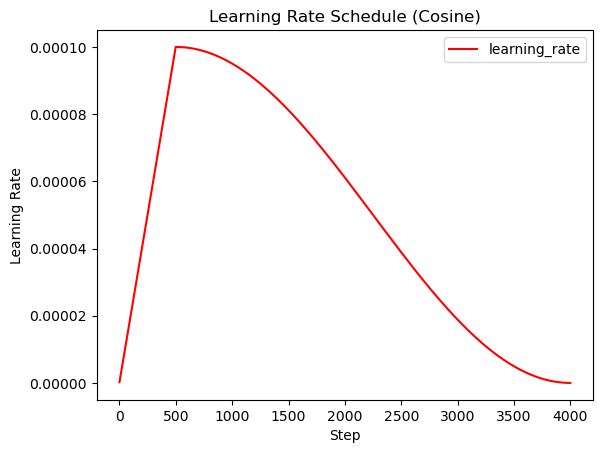

In [49]:
# compute lr

import matplotlib.pyplot as plt

test_schedule = CosineSchedule(train_steps=4000, warmup_steps=500)
lrs = []
for step_num in range(4000):
    lrs.append(test_schedule.step())

# draw
plt.plot(lrs, 'r-', label='learning_rate')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Learning Rate Schedule (Cosine)')
plt.show()

모델을 실제로 빌드

In [50]:
class Config:
    def __init__(self, config_dict):
        for key, value in config_dict.items():
            setattr(self, key, value)

config = Config({
    "d_model": 256,
    "n_head": 8, 
    "d_head": 64,
    "dropout": 0.1,
    "d_ff": 1024,
    "layernorm_epsilon": 0.001,
    "n_layer": 6,
    "n_seq": 256,
    "n_vocab": 3000,
    "i_pad": 0
})


config.n_vocab = vocab.get_piece_size()
config.i_pad = vocab.pad_id()

In [51]:
# 모델 생성
from torchinfo import summary

config.n_seq = 256
pre_train_model = build_model_pre_train(config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pre_train_model.to(device)

enc_tokens_example = torch.randint(0, config.n_vocab, (10, config.n_seq), dtype=torch.long).to(device)
segments_example = torch.randint(0, 2, (10, config.n_seq), dtype=torch.long).to(device)

summary(pre_train_model, [(10, config.n_seq), (10, config.n_seq)])

Layer (type:depth-idx)                                       Output Shape              Param #
PreTrainModel                                                [10, 2]                   --
├─BERT: 1-1                                                  [10, 256]                 --
│    └─SharedEmbedding: 2-1                                  [10, 256, 256]            2,049,792
│    └─PositionEmbedding: 2-2                                [10, 256, 256]            --
│    │    └─Embedding: 3-1                                   [10, 256, 256]            65,536
│    └─Embedding: 2-3                                        [10, 256, 256]            512
│    └─LayerNorm: 2-4                                        [10, 256, 256]            512
│    └─Dropout: 2-5                                          [10, 256, 256]            --
│    └─ModuleList: 2-6                                       --                        --
│    │    └─EncoderLayer: 3-2                                [10, 256, 256]       

In [54]:
import torch.optim as optim

epochs = 100
batch_size = 64

# optimizer
train_steps = math.ceil(len(pre_train_inputs[0]) / batch_size) * epochs
print("train_steps:", train_steps)
learning_rate_scheduler = CosineSchedule(train_steps=train_steps, warmup_steps=max(100, train_steps // 10))
optimizer = optim.Adam(pre_train_model.parameters(), lr=1e-4)

loss_fn_nsp = nn.CrossEntropyLoss()
#loss_fn_mlm = nn.CrossEntropyLoss()
loss_fn_mlm = nn.CrossEntropyLoss(ignore_index=0) # i_pad 값이 0이므로 0을 무시하도록 설정

train_steps: 199900


In [55]:
# 올바른 들여쓰기가 적용된 전체 학습 루프

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # GPU가 있으면 cuda 사용, 없으면 CPU



history = {
    'nsp_loss': [], 'mlm_loss': [],
    'nsp_acc': [], 'mlm_acc': []
}

# 1. 먼저 memmap 객체를 torch 텐서로 변환합니다.
enc_tokens_tensor = torch.tensor(pre_train_inputs[0])
segments_tensor = torch.tensor(pre_train_inputs[1])
labels_nsp_tensor = torch.tensor(pre_train_labels[0])
labels_mlm_tensor = torch.tensor(pre_train_labels[1])

# 2. 변환된 텐서로 TensorDataset를 만듭니다.
train_dataset = TensorDataset(enc_tokens_tensor, segments_tensor, labels_nsp_tensor, labels_mlm_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


for epoch in range(epochs):
    pre_train_model.train()
    total_loss, total_nsp_loss, total_mlm_loss = 0, 0, 0
    total_nsp_acc, total_mlm_acc = 0, 0

    # for batch 루프 시작 (이 안의 코드는 모두 동일한 들여쓰기를 가짐)
    for batch in tqdm(train_dataloader):
        # 1. 데이터를 GPU로 이동
        enc_tokens_batch, segments_batch, labels_nsp_batch, labels_mlm_batch = [b.to(device) for b in batch]
        
        # 2. 그래디언트 초기화
        optimizer.zero_grad()

        # 3. 모델 순전파 (forward pass)
        logits_nsp, logits_mlm = pre_train_model(enc_tokens_batch, segments_batch)

        # 4. 정답 레이블 타입 변환
        labels_nsp_batch = labels_nsp_batch.long()
        labels_mlm_batch = labels_mlm_batch.clamp(0, config.n_vocab - 1).long()

        # 5. 손실 계산
        loss_nsp = loss_fn_nsp(logits_nsp, labels_nsp_batch)
        loss_mlm = loss_fn_mlm(logits_mlm.view(-1, logits_mlm.shape[-1]), labels_mlm_batch.view(-1))
        total_loss_batch = loss_nsp + loss_mlm

        # 6. 역전파 (backward pass)
        total_loss_batch.backward()

        # 7. Learning Rate 스케줄러 업데이트 (올바른 위치)
        new_lr = learning_rate_scheduler.step()
        for param_group in optimizer.param_groups:
            param_group['lr'] = new_lr
        
        # 8. 옵티마이저 스텝 (가중치 업데이트)
        optimizer.step()

        # 9. 정확도 계산
        nsp_acc = (logits_nsp.argmax(dim=-1) == labels_nsp_batch).float().mean()
        
        y_pred_class = logits_mlm.argmax(dim=-1)
        matches = (labels_mlm_batch == y_pred_class).float()
        mask = (labels_mlm_batch != 0).float()
        matches *= mask
        mlm_acc = matches.sum() / mask.sum().clamp(min=1)

        # 10. 배치별 결과 누적
        total_nsp_loss += loss_nsp.item()
        total_mlm_loss += loss_mlm.item()
        total_nsp_acc += nsp_acc.item()
        total_mlm_acc += mlm_acc.item()
    # for batch 루프 끝

    # Epoch 결과 집계 및 출력
    history['nsp_loss'].append(total_nsp_loss / len(train_dataloader))
    history['mlm_loss'].append(total_mlm_loss / len(train_dataloader))
    history['nsp_acc'].append(total_nsp_acc / len(train_dataloader))
    history['mlm_acc'].append(total_mlm_acc / len(train_dataloader))

    print(f"Epoch {epoch+1}/{epochs} - "
          f"NSP Loss: {history['nsp_loss'][-1]:.4f}, MLM Loss: {history['mlm_loss'][-1]:.4f}, "
          f"NSP Acc: {history['nsp_acc'][-1]:.4f}, MLM Acc: {history['mlm_acc'][-1]:.4f}")

    # 모델 저장
    torch.save(pre_train_model.state_dict(), f"data/bert_pre_train_epoch_{epoch+1}.pt")

100%|██████████| 1999/1999 [05:35<00:00,  5.97it/s]


Epoch 1/100 - NSP Loss: 0.6193, MLM Loss: 7.7190, NSP Acc: 0.5983, MLM Acc: 0.0290


100%|██████████| 1999/1999 [05:35<00:00,  5.96it/s]


Epoch 2/100 - NSP Loss: 0.6126, MLM Loss: 7.4385, NSP Acc: 0.5958, MLM Acc: 0.0290


100%|██████████| 1999/1999 [05:35<00:00,  5.96it/s]


Epoch 3/100 - NSP Loss: 0.6113, MLM Loss: 7.4234, NSP Acc: 0.5967, MLM Acc: 0.0290


100%|██████████| 1999/1999 [05:35<00:00,  5.96it/s]


Epoch 4/100 - NSP Loss: 0.6004, MLM Loss: 7.4123, NSP Acc: 0.5969, MLM Acc: 0.0290


100%|██████████| 1999/1999 [05:36<00:00,  5.95it/s]


Epoch 5/100 - NSP Loss: 0.5916, MLM Loss: 7.3908, NSP Acc: 0.5946, MLM Acc: 0.0293


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 6/100 - NSP Loss: 0.5899, MLM Loss: 7.3637, NSP Acc: 0.5958, MLM Acc: 0.0313


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 7/100 - NSP Loss: 0.5869, MLM Loss: 7.3339, NSP Acc: 0.5995, MLM Acc: 0.0339


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 8/100 - NSP Loss: 0.5856, MLM Loss: 7.2807, NSP Acc: 0.5992, MLM Acc: 0.0370


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 9/100 - NSP Loss: 0.5839, MLM Loss: 7.1519, NSP Acc: 0.6015, MLM Acc: 0.0446


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 10/100 - NSP Loss: 0.5801, MLM Loss: 6.8850, NSP Acc: 0.6086, MLM Acc: 0.0592


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 11/100 - NSP Loss: 0.5660, MLM Loss: 6.5112, NSP Acc: 0.6200, MLM Acc: 0.0834


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 12/100 - NSP Loss: 0.5559, MLM Loss: 6.0349, NSP Acc: 0.6275, MLM Acc: 0.1135


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 13/100 - NSP Loss: 0.5510, MLM Loss: 5.7163, NSP Acc: 0.6289, MLM Acc: 0.1393


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 14/100 - NSP Loss: 0.5478, MLM Loss: 5.4930, NSP Acc: 0.6301, MLM Acc: 0.1591


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 15/100 - NSP Loss: 0.5439, MLM Loss: 5.3145, NSP Acc: 0.6356, MLM Acc: 0.1747


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 16/100 - NSP Loss: 0.5406, MLM Loss: 5.1657, NSP Acc: 0.6362, MLM Acc: 0.1872


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 17/100 - NSP Loss: 0.5379, MLM Loss: 5.0459, NSP Acc: 0.6381, MLM Acc: 0.1967


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 18/100 - NSP Loss: 0.5345, MLM Loss: 4.9482, NSP Acc: 0.6424, MLM Acc: 0.2044


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 19/100 - NSP Loss: 0.5310, MLM Loss: 4.8652, NSP Acc: 0.6458, MLM Acc: 0.2104


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 20/100 - NSP Loss: 0.5273, MLM Loss: 4.7920, NSP Acc: 0.6514, MLM Acc: 0.2164


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 21/100 - NSP Loss: 0.5237, MLM Loss: 4.7260, NSP Acc: 0.6561, MLM Acc: 0.2218


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 22/100 - NSP Loss: 0.5192, MLM Loss: 4.6640, NSP Acc: 0.6623, MLM Acc: 0.2271


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 23/100 - NSP Loss: 0.5140, MLM Loss: 4.6092, NSP Acc: 0.6685, MLM Acc: 0.2322


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 24/100 - NSP Loss: 0.5099, MLM Loss: 4.5594, NSP Acc: 0.6747, MLM Acc: 0.2368


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 25/100 - NSP Loss: 0.5028, MLM Loss: 4.5140, NSP Acc: 0.6834, MLM Acc: 0.2410


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 26/100 - NSP Loss: 0.4947, MLM Loss: 4.4741, NSP Acc: 0.6951, MLM Acc: 0.2447


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 27/100 - NSP Loss: 0.4861, MLM Loss: 4.4365, NSP Acc: 0.7048, MLM Acc: 0.2483


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 28/100 - NSP Loss: 0.4748, MLM Loss: 4.4021, NSP Acc: 0.7176, MLM Acc: 0.2516


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 29/100 - NSP Loss: 0.4641, MLM Loss: 4.3722, NSP Acc: 0.7291, MLM Acc: 0.2544


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 30/100 - NSP Loss: 0.4495, MLM Loss: 4.3441, NSP Acc: 0.7429, MLM Acc: 0.2570


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 31/100 - NSP Loss: 0.4349, MLM Loss: 4.3185, NSP Acc: 0.7565, MLM Acc: 0.2592


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 32/100 - NSP Loss: 0.4189, MLM Loss: 4.2966, NSP Acc: 0.7709, MLM Acc: 0.2617


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 33/100 - NSP Loss: 0.4025, MLM Loss: 4.2743, NSP Acc: 0.7832, MLM Acc: 0.2637


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 34/100 - NSP Loss: 0.3827, MLM Loss: 4.2555, NSP Acc: 0.7996, MLM Acc: 0.2652


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 35/100 - NSP Loss: 0.3630, MLM Loss: 4.2385, NSP Acc: 0.8133, MLM Acc: 0.2670


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 36/100 - NSP Loss: 0.3436, MLM Loss: 4.2221, NSP Acc: 0.8275, MLM Acc: 0.2683


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 37/100 - NSP Loss: 0.3230, MLM Loss: 4.2065, NSP Acc: 0.8411, MLM Acc: 0.2696


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 38/100 - NSP Loss: 0.3032, MLM Loss: 4.1913, NSP Acc: 0.8544, MLM Acc: 0.2711


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 39/100 - NSP Loss: 0.2827, MLM Loss: 4.1778, NSP Acc: 0.8664, MLM Acc: 0.2723


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 40/100 - NSP Loss: 0.2648, MLM Loss: 4.1646, NSP Acc: 0.8774, MLM Acc: 0.2736


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 41/100 - NSP Loss: 0.2483, MLM Loss: 4.1532, NSP Acc: 0.8866, MLM Acc: 0.2744


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 42/100 - NSP Loss: 0.2272, MLM Loss: 4.1413, NSP Acc: 0.8986, MLM Acc: 0.2756


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 43/100 - NSP Loss: 0.2121, MLM Loss: 4.1297, NSP Acc: 0.9056, MLM Acc: 0.2765


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 44/100 - NSP Loss: 0.1975, MLM Loss: 4.1190, NSP Acc: 0.9135, MLM Acc: 0.2777


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 45/100 - NSP Loss: 0.1826, MLM Loss: 4.1066, NSP Acc: 0.9212, MLM Acc: 0.2788


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 46/100 - NSP Loss: 0.1693, MLM Loss: 4.0981, NSP Acc: 0.9281, MLM Acc: 0.2797


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 47/100 - NSP Loss: 0.1559, MLM Loss: 4.0857, NSP Acc: 0.9354, MLM Acc: 0.2806


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 48/100 - NSP Loss: 0.1450, MLM Loss: 4.0773, NSP Acc: 0.9405, MLM Acc: 0.2814


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 49/100 - NSP Loss: 0.1348, MLM Loss: 4.0660, NSP Acc: 0.9447, MLM Acc: 0.2827


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 50/100 - NSP Loss: 0.1237, MLM Loss: 4.0557, NSP Acc: 0.9498, MLM Acc: 0.2835


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 51/100 - NSP Loss: 0.1162, MLM Loss: 4.0451, NSP Acc: 0.9546, MLM Acc: 0.2847


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 52/100 - NSP Loss: 0.1116, MLM Loss: 4.0360, NSP Acc: 0.9557, MLM Acc: 0.2857


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 53/100 - NSP Loss: 0.1009, MLM Loss: 4.0262, NSP Acc: 0.9603, MLM Acc: 0.2863


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 54/100 - NSP Loss: 0.0946, MLM Loss: 4.0172, NSP Acc: 0.9637, MLM Acc: 0.2873


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 55/100 - NSP Loss: 0.0900, MLM Loss: 4.0075, NSP Acc: 0.9655, MLM Acc: 0.2884


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 56/100 - NSP Loss: 0.0837, MLM Loss: 3.9980, NSP Acc: 0.9676, MLM Acc: 0.2891


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 57/100 - NSP Loss: 0.0779, MLM Loss: 3.9890, NSP Acc: 0.9701, MLM Acc: 0.2901


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 58/100 - NSP Loss: 0.0751, MLM Loss: 3.9799, NSP Acc: 0.9711, MLM Acc: 0.2910


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 59/100 - NSP Loss: 0.0710, MLM Loss: 3.9715, NSP Acc: 0.9735, MLM Acc: 0.2919


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 60/100 - NSP Loss: 0.0656, MLM Loss: 3.9619, NSP Acc: 0.9756, MLM Acc: 0.2928


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 61/100 - NSP Loss: 0.0637, MLM Loss: 3.9540, NSP Acc: 0.9760, MLM Acc: 0.2937


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 62/100 - NSP Loss: 0.0596, MLM Loss: 3.9449, NSP Acc: 0.9774, MLM Acc: 0.2946


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 63/100 - NSP Loss: 0.0574, MLM Loss: 3.9367, NSP Acc: 0.9788, MLM Acc: 0.2955


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 64/100 - NSP Loss: 0.0539, MLM Loss: 3.9291, NSP Acc: 0.9800, MLM Acc: 0.2962


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 65/100 - NSP Loss: 0.0522, MLM Loss: 3.9218, NSP Acc: 0.9810, MLM Acc: 0.2969


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 66/100 - NSP Loss: 0.0491, MLM Loss: 3.9138, NSP Acc: 0.9819, MLM Acc: 0.2978


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 67/100 - NSP Loss: 0.0471, MLM Loss: 3.9060, NSP Acc: 0.9828, MLM Acc: 0.2986


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 68/100 - NSP Loss: 0.0447, MLM Loss: 3.8999, NSP Acc: 0.9834, MLM Acc: 0.2992


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 69/100 - NSP Loss: 0.0420, MLM Loss: 3.8918, NSP Acc: 0.9848, MLM Acc: 0.3001


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 70/100 - NSP Loss: 0.0401, MLM Loss: 3.8853, NSP Acc: 0.9855, MLM Acc: 0.3007


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 71/100 - NSP Loss: 0.0389, MLM Loss: 3.8785, NSP Acc: 0.9858, MLM Acc: 0.3014


100%|██████████| 1999/1999 [05:37<00:00,  5.92it/s]


Epoch 72/100 - NSP Loss: 0.0368, MLM Loss: 3.8725, NSP Acc: 0.9871, MLM Acc: 0.3022


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 73/100 - NSP Loss: 0.0363, MLM Loss: 3.8671, NSP Acc: 0.9870, MLM Acc: 0.3027


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 74/100 - NSP Loss: 0.0335, MLM Loss: 3.8615, NSP Acc: 0.9877, MLM Acc: 0.3032


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 75/100 - NSP Loss: 0.0326, MLM Loss: 3.8557, NSP Acc: 0.9877, MLM Acc: 0.3037


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 76/100 - NSP Loss: 0.0310, MLM Loss: 3.8504, NSP Acc: 0.9889, MLM Acc: 0.3042


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 77/100 - NSP Loss: 0.0293, MLM Loss: 3.8451, NSP Acc: 0.9898, MLM Acc: 0.3050


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 78/100 - NSP Loss: 0.0288, MLM Loss: 3.8405, NSP Acc: 0.9897, MLM Acc: 0.3057


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 79/100 - NSP Loss: 0.0275, MLM Loss: 3.8363, NSP Acc: 0.9899, MLM Acc: 0.3059


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 80/100 - NSP Loss: 0.0256, MLM Loss: 3.8312, NSP Acc: 0.9910, MLM Acc: 0.3066


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 81/100 - NSP Loss: 0.0252, MLM Loss: 3.8273, NSP Acc: 0.9910, MLM Acc: 0.3071


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 82/100 - NSP Loss: 0.0250, MLM Loss: 3.8242, NSP Acc: 0.9910, MLM Acc: 0.3074


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 83/100 - NSP Loss: 0.0237, MLM Loss: 3.8196, NSP Acc: 0.9915, MLM Acc: 0.3076


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 84/100 - NSP Loss: 0.0222, MLM Loss: 3.8169, NSP Acc: 0.9922, MLM Acc: 0.3078


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 85/100 - NSP Loss: 0.0218, MLM Loss: 3.8130, NSP Acc: 0.9922, MLM Acc: 0.3086


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 86/100 - NSP Loss: 0.0216, MLM Loss: 3.8111, NSP Acc: 0.9924, MLM Acc: 0.3087


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 87/100 - NSP Loss: 0.0210, MLM Loss: 3.8089, NSP Acc: 0.9925, MLM Acc: 0.3089


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 88/100 - NSP Loss: 0.0199, MLM Loss: 3.8058, NSP Acc: 0.9930, MLM Acc: 0.3091


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 89/100 - NSP Loss: 0.0201, MLM Loss: 3.8045, NSP Acc: 0.9934, MLM Acc: 0.3094


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 90/100 - NSP Loss: 0.0201, MLM Loss: 3.8024, NSP Acc: 0.9932, MLM Acc: 0.3097


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 91/100 - NSP Loss: 0.0194, MLM Loss: 3.8009, NSP Acc: 0.9931, MLM Acc: 0.3099


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 92/100 - NSP Loss: 0.0189, MLM Loss: 3.7993, NSP Acc: 0.9934, MLM Acc: 0.3102


100%|██████████| 1999/1999 [05:36<00:00,  5.93it/s]


Epoch 93/100 - NSP Loss: 0.0188, MLM Loss: 3.7977, NSP Acc: 0.9936, MLM Acc: 0.3103


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]


Epoch 94/100 - NSP Loss: 0.0171, MLM Loss: 3.7974, NSP Acc: 0.9940, MLM Acc: 0.3103


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 95/100 - NSP Loss: 0.0182, MLM Loss: 3.7969, NSP Acc: 0.9937, MLM Acc: 0.3103


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 96/100 - NSP Loss: 0.0178, MLM Loss: 3.7954, NSP Acc: 0.9941, MLM Acc: 0.3104


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 97/100 - NSP Loss: 0.0173, MLM Loss: 3.7954, NSP Acc: 0.9941, MLM Acc: 0.3106


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 98/100 - NSP Loss: 0.0176, MLM Loss: 3.7947, NSP Acc: 0.9939, MLM Acc: 0.3106


100%|██████████| 1999/1999 [05:36<00:00,  5.94it/s]


Epoch 99/100 - NSP Loss: 0.0173, MLM Loss: 3.7947, NSP Acc: 0.9939, MLM Acc: 0.3106


100%|██████████| 1999/1999 [05:37<00:00,  5.93it/s]

Epoch 100/100 - NSP Loss: 0.0181, MLM Loss: 3.7944, NSP Acc: 0.9933, MLM Acc: 0.3102


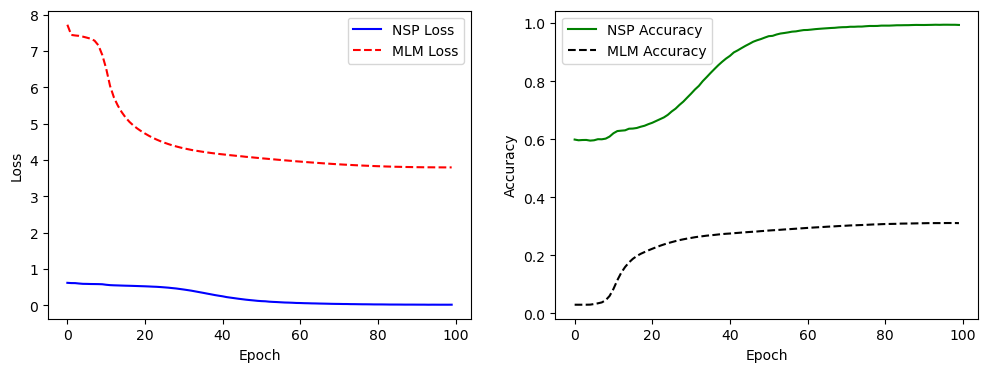

In [56]:
import matplotlib.pyplot as plt

# training result
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['nsp_loss'], 'b-', label='NSP Loss')
plt.plot(history['mlm_loss'], 'r--', label='MLM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['nsp_acc'], 'g-', label='NSP Accuracy')
plt.plot(history['mlm_acc'], 'k--', label='MLM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

임의의 5개 테스트 데이터를 모델에 입력하여, 모델의 예측 확인.

In [57]:
# 제목: 학습된 모델 성능 평가 코드 (수정 완료)

import torch        # torch 라이브러리 임포트
import numpy as np  # numpy 라이브러리 임포트

# [MASK] 토큰의 ID를 vocab 객체로부터 가져오기
# (주의: 이 코드가 실행되기 전, vocab 변수에는 SentencePieceProcessor 객체가 올바르게 로드되어 있어야 합니다)
mask_token_id = vocab.piece_to_id("[MASK]")

# 테스트 데이터셋에서 무작위로 5개의 샘플을 선택하여 루프 실행
for _idx in np.random.randint(len(test_input[0]), size=5).tolist():
    print("< DATA >".center(100, "=")) # 샘플 시작을 알리는 구분선 출력

    # ===============================
    # 1. 입력 데이터 준비 및 정답 출력
    # ===============================
    # 테스트 데이터셋에서 NumPy 배열(memmap) 형태의 데이터를 가져옴
    input_data = test_input[0][_idx]
    token_type_data = test_input[1][_idx]
    nsp_label_data = test_label[0][_idx]
    mlm_label_data = test_label[1][_idx]

    # NumPy 배열을 PyTorch 텐서로 변환
    input_tensor = torch.tensor(input_data)
    token_type_tensor = torch.tensor(token_type_data)
    
    # 모델 입력을 위해 배치 차원(batch dimension)을 추가하고 GPU로 데이터를 이동
    input_ids = input_tensor.unsqueeze(0).to(device)
    token_type_ids = token_type_tensor.unsqueeze(0).to(device)

    # 변환된 텐서를 사용해 입력 문장과 정답을 화면에 출력
    print("Input Sentence:", vocab.decode_ids(input_tensor.tolist()), end="\n\n")
    print("NSP Answer:".ljust(13), bool(nsp_label_data))
    print("[MASK] Answer:".ljust(13), vocab.decode_ids(mlm_label_data.tolist()).split(), end="\n\n")

    # ===============================
    # 2. 모델 추론 (Inference)
    # ===============================
    # 불필요한 그래디언트 계산을 방지하여 메모리와 속도를 최적화
    with torch.no_grad():
        # 준비된 데이터를 모델에 입력하여 NSP와 MLM에 대한 예측 결과를 받음
        nsp_predict, mask_predict = pre_train_model(input_ids, token_type_ids)

    # ===============================
    # 3. NSP(다음 문장 예측) 결과 처리
    # ===============================
    # 예측 결과를 CPU로 이동시키고 NumPy 배열로 변환
    nsp_predict_cpu = nsp_predict.detach().cpu()
    # 가장 확률이 높은 클래스(0 또는 1)를 최종 예측 결과로 선택
    nsp_result = torch.argmax(nsp_predict_cpu)
    # 결과를 True/False 형태로 변환하여 출력
    print("NSP Predict:".ljust(13), bool(nsp_result.item()))

    # ===============================
    # 4. MLM(마스크된 언어 모델) 결과 처리
    # ===============================
    # MLM 예측 결과를 CPU로 이동
    mask_predict_cpu = mask_predict.detach().cpu()

    # 입력 데이터에서 [MASK] 토큰의 위치(인덱스)들을 찾음
    mask_token_indices = (input_ids == mask_token_id).nonzero(as_tuple=True)[1]

    # 마스킹된 각 위치에 대한 예측 결과를 저장할 리스트 초기화
    mask_predictions = []
    # 찾은 MASK 위치들을 하나씩 순회
    for idx in mask_token_indices:
        # 해당 위치의 로짓(logits) 벡터를 가져옴 (크기: vocab_size)
        logits = mask_predict_cpu[0, idx]
        # 로짓 값 기준 상위 5개의 예측 토큰과 그 확률을 가져옴
        topk = torch.topk(logits, k=5)
        # 상위 5개 토큰의 ID를 실제 단어로 변환
        predicted_tokens = [vocab.decode_ids([i.item()]) for i in topk.indices]
        # 변환된 단어 리스트를 최종 결과 리스트에 추가
        mask_predictions.append(predicted_tokens)

    # 예측된 결과가 있으면 출력, 없으면 없다고 출력
    if mask_predictions:
        print("[MASK] Predict:".ljust(13), mask_predictions)
    else:
        print("[MASK] Predict:".ljust(13), "No prediction")

    print("=" * 100, end="\n\n\n") # 샘플 끝을 알리는 구분선 출력

==============================================< DATA >==============================================
Input Sentence: [CLS][MASK] 맥스웰은 전자기파의[MASK][MASK] 중력과 같이 원격에서[MASK][MASK][MASK] 힘이 아닌 전자기장에서 빛의 속도로 전파되는 전위로 파악하였다. 라디오[MASK][MASK][MASK][MASK] 대한 현대의[MASK][MASK] 맥스웰의 백터와 스칼라 위키에 대한 수식만으로 서로 떨어져 있는[MASK][MASK][MASK] 사이에 작용하는 전파의 영향을 모두 설명할 수 있다.[SEP] "장"(場)이란[MASK][MASK] 마이클 패러데이가 도입하였다. 알베르트 아인슈타인은 맥스웰이 장 개념을 도입한 것에 대해 다음과 같이 평가하였다.[SEP]

NSP Answer:   False
[MASK] Answer: ['년', '전달을', '상호작용하는', '안테나에', '분석에서도', '떨어져', '안테나', '개념은']

NSP Predict:  True
[MASK] Predict: [['.', ',', '인', '에서', '그러나'], ['특', '양', '광', '원', '합'], ['성', '의', '형', '열', '자'], ['생', '', '수', '적', '빠'], ['출', '되', '해', '열', '화'], ['되는', '한', '하는', '된', '기'], ['브라', '라이', '', '플', '채널'], ['스', '자', '드', '트', '소'], ['밍', '럼', '칙', '학', '셜'], ['에', '들에', '계에', '리에', '스에'], ['양', '원', '연구', '이론', '전'], ['은', '인', '학자', '는', '식은'], ['전자', '전', '전기', '양', ''], ['기', '드', '리', '단', '스'], ['들', '트', '성', '웨어', '밍'], [

-끝-